In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_pickle('df_neighborhoods_dists_seasons.pkl')

1. Here, the first approach is to try to use the Census data by block groups.  Map each point to the member block group then assign the economic indicator associated with that block group.
2. Second approach is to ask Giovanna for help making the scraping from zillow work.

Here is a link for some help on re-projecting the shape files, which are in different projections than before; but that doesn't matter.  I can just use the new projection with my basemap, right?
http://geoinformaticstutorial.blogspot.com/2012/10/reprojecting-shapefile-with-gdalogr-and.html

In [3]:
import fiona
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep

In [4]:
pd.set_option('display.max_columns', 500)

Make sure I'm keeping the objectid which identifies the pothole

In [6]:
df.head(10)

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td,latitude,longitude,address,address_detail,neighborhood_cat,Seattle_dist,Space_Needle_dist,Pike_Place_dist,Convention_Center_dist,Woodland_Park_dist,Queene_Anne_dist,INIT_Quarter,days_end_FY
0,1,2456,Holden pl SW bt SW Kenyon Holden ...,HOLDEN PL SW BETWEEN SW HOLDEN ST AND SW KENYO...,2010-03-29 07:00:00,2010-04-06 07:00:00,2010-04-06 07:00:00,8 days,8,47.531858,-122.363186,"SW Kenyon St, Seattle, WA, USA","2438 SW Kenyon St, Seattle, WA 98106, USA",93,5.338641,6.158729,5.467939,5.688451,9.453253,7.300465,1,3
1,2,2514,"NE Pacific Street, one block west of Montlake ...",MONTLAKE BLVD NE AND NE PACIFIC ST ...,2010-03-30 07:00:00,2010-04-01 07:00:00,2010-04-01 07:00:00,2 days,2,47.649014,-122.304655,"Montlake Blvd NE & NE Pacific St, Seattle, WA ...","3705-3707 Montlake Blvd NE, Seattle, WA 98105,...",42,3.222458,2.867154,3.231487,2.889531,2.654837,2.610214,1,3
2,3,2649,32nd Ave NE and NE 135th ...,NE 135TH ST BETWEEN 32ND AVE NE AND LAKE CITY ...,2010-03-31 07:00:00,2010-04-01 07:00:00,2010-04-01 07:00:00,1 days,1,47.707446,-122.301566,"Lake City Way NE, Seattle, WA, USA","10754-10850 Lake City Way NE, Seattle, WA 9812...",105,7.137526,6.405817,7.012778,6.783446,3.623119,5.502601,1,3
3,4,1591,Charles st & 6 Ave S pothole next to traffic l...,S CHARLES ST BETWEEN 6TH AVE S AND MAYNARD AVE...,2010-03-15 07:00:00,2010-03-16 07:00:00,2010-03-16 07:00:00,1 days,1,47.597085,-122.325065,"Maynard Ave S, Seattle, WA, USA","608 Maynard Ave S, Seattle, WA 98104, USA",61,0.710334,1.974308,1.184267,1.035443,5.113765,3.183602,1,3
4,5,1680,N 80th St between Corliss Ave N and 2nd Ave NE...,N 80TH ST BETWEEN CORLISS (W LEG) AVE N AND CO...,2010-03-16 07:00:00,2010-03-17 07:00:00,2010-03-17 07:00:00,1 days,1,47.606209,-122.332071,"Seattle, WA, USA","909 5th Ave, Seattle, WA 98164, USA",62,0.000000,1.273452,0.531474,0.358295,4.422391,2.473518,1,3
5,6,5642,52nd St. & 18th Ave. NE ...,18TH AVE NE BETWEEN NE 52ND ST AND NE 55TH ST ...,2010-04-19 07:00:00,2010-04-22 07:00:00,2010-04-22 07:00:00,3 days,3,47.668522,-122.295630,"NE 55th St, Seattle, WA 98105, USA","2914 NE 55th St, Seattle, WA 98105, USA",36,4.628992,4.156594,4.607589,4.291005,2.707355,3.612252,2,2
6,7,7585,...,3RD AVE NW BETWEEN NW 125TH ST AND NW 127TH ST...,2010-05-03 07:00:00,2010-05-04 07:00:00,2010-05-04 07:00:00,1 days,1,47.721476,-122.364984,"NW 127th St, Seattle, WA 98177, USA","12701 7th Ave NW, Seattle, WA 98177, USA",112,8.110129,7.014027,7.793727,7.762688,3.695250,5.813108,2,1
9,10,7211,Republican and Minor Ave N ...,MINOR AVE N AND REPUBLICAN ST ...,2010-04-29 07:00:00,2010-05-03 07:00:00,2010-05-03 07:00:00,4 days,4,47.623131,-122.333003,"Republican St & Minor Ave N, Seattle, WA 98109...","500 Minor Ave N, Seattle, WA 98109, USA",49,1.169861,0.781462,1.021139,0.813571,3.281758,1.527051,2,2
10,11,3168,...,17TH AVE W BETWEEN W DRAVUS ST AND W BERTONA S...,2010-04-02 07:00:00,2010-04-06 07:00:00,2010-04-06 07:00:00,4 days,4,47.650311,-122.388604,"W Bertona St, Seattle, WA, USA","2500 W Bertona St, Seattle, WA 98199, USA",50,4.031574,2.758997,3.544222,3.781162,2.061169,1.686262,2,2
12,13,6967,B/T Pike and Pine B/t 211 and 215 ...,PIKE ST BETWEEN 2ND AVE AND 3RD AVE ...,2010-04-28 07:00:00,2010-05-03 07:00:00,2010-05-03 07:00:00,5 days,5,47.610741,-122.338703,"3rd Ave, Seattle, WA, USA","299 Pine St, Seattle, WA 98101, USA",62,0.440475,0.836150,0.177650,0.331137,4.053555,2.052527,2,2


In [ ]:
df[df.]

In [7]:
shapefilename = 'data/tl_2013_53_bg'
shp = fiona.open(shapefilename+'.shp')
coords = shp.bounds
shp.close()

In [8]:
w, h = coords[2] - coords[0], coords[3] - coords[1]
extra = 0.01

In [9]:
m = Basemap(
    projection='tmerc', ellps='GRS80',
    lon_0=np.mean([coords[0], coords[2]]),
    lat_0=np.mean([coords[1], coords[3]]),
    llcrnrlon=coords[0] - extra * w,
    llcrnrlat=coords[1] - (extra * h), 
    urcrnrlon=coords[2] + extra * w,
    urcrnrlat=coords[3] + (extra * h),
    resolution='i',  suppress_ticks=True)

_out = m.readshapefile(shapefilename, name='seattle', drawbounds=False, color='none', zorder=2)

In [17]:
# set up a map dataframe
df_map = pd.DataFrame({
    'poly': [Polygon(hood_points) for hood_points in m.seattle],
    'name': [hood['GEOID'] for hood in m.seattle_info],
    'NAMELSAD': [hood['NAMELSAD'] for hood in m.seattle_info]
})

In [39]:
len(m.seattle)

4967

In [40]:
len(m.seattle_info)

4967

In [18]:
m.seattle[0]

[(76372.1837724394, 296831.3160397418),
 (76414.9330148676, 296941.55881898897),
 (76437.82173002214, 296940.5970466098),
 (76459.99622778769, 296924.4075484186),
 (76469.50428969011, 296906.18873605307),
 (76468.93908165072, 296832.4849092442),
 (76484.99118619881, 296791.0488173624),
 (76537.96758157274, 296717.6577132871),
 (76575.63593977079, 296644.9099681652),
 (76566.34692615445, 296604.53832020087),
 (76560.40145943672, 296604.7879766279),
 (76543.52652917488, 296605.3852358076),
 (76506.18142248754, 296627.3345127087),
 (76475.77654463646, 296692.2044216575),
 (76460.93342195178, 296700.4011872138),
 (76422.56540890591, 296694.4399399185),
 (76404.01028229424, 296679.8504000776),
 (76378.84981576915, 296683.46923131176),
 (76371.54597815886, 296693.91094144015),
 (76366.31582283965, 296750.1503938583),
 (76372.1837724394, 296831.3160397418)]

In [19]:
m.seattle_info[0]

{'ALAND': 918496330,
 'AWATER': 32608372,
 'BLKGRPCE': '1',
 'COUNTYFP': '009',
 'FUNCSTAT': 'S',
 'GEOID': '530090002001',
 'INTPTLAT': '+48.1797346',
 'INTPTLON': '-124.4116596',
 'MTFCC': 'G5030',
 'NAMELSAD': 'Block Group 1',
 'RINGNUM': 1,
 'SHAPENUM': 1,
 'STATEFP': '53',
 'TRACTCE': '000200'}

In [20]:
df_map.shape

(4967, 3)

I think that 'GEOID' gives a unique reference to the block group 

In [21]:
df_map.NAMELSAD.value_counts()

Block Group 1    1492
Block Group 2    1441
Block Group 3    1070
Block Group 4     557
Block Group 5     224
Block Group 0     101
Block Group 6      67
Block Group 7      14
Block Group 8       1
dtype: int64

In [51]:
df_map_sub = df_map.loc[df_map.name == '530090002001']

In [22]:
df_map.name.value_counts()

530099901000    39
530579901000    28
530090004002    19
530559901000    19
530579501001    14
530090002001    12
530559601003    10
530099400002     9
530579403001     6
530559601001     6
530579501002     3
530559605002     3
530579408001     3
530299702001     3
530299922010     3
530579408002     3
530579403002     3
530250114022     2
530439604001     2
530619900020     2
530099400001     2
530319900000     2
530250101001     2
530210208003     2
530019501001     2
530330319041     2
530319507021     2
530359901000     2
530339901000     2
530330327022     2
                ..
530630104012     1
530630104011     1
530110407103     1
530330302021     1
530659501002     1
530659501003     1
530659501004     1
530659501005     1
530659501006     1
530330203003     1
530350929012     1
530670122124     1
530630112024     1
530630112022     1
530530724063     1
530610413041     1
530039603003     1
530039603002     1
530039603001     1
530050103001     1
530530724061     1
530530724062

In [50]:
df_map.head(13)

,NAMELSAD,name,poly
0,Block Group 1,530090002001,"POLYGON ((76372.1837724394 296831.3160397418, ..."
1,Block Group 1,530090002001,"POLYGON ((76083.27539311806 297518.1545957717,..."
2,Block Group 1,530090002001,"POLYGON ((32509.63250306045 301181.2920169401,..."
3,Block Group 1,530090002001,"POLYGON ((32258.78003364161 303634.5005146299,..."
4,Block Group 1,530090002001,"POLYGON ((32075.85014757153 301988.6861632536,..."
5,Block Group 1,530090002001,"POLYGON ((32157.64576375252 303870.6778457869,..."
6,Block Group 1,530090002001,"POLYGON ((31993.00067418558 302718.8730796358,..."
7,Block Group 1,530090002001,"POLYGON ((31882.36370828812 304145.6403083883,..."
8,Block Group 1,530090002001,"POLYGON ((29530.27996902668 295181.3982292833,..."
9,Block Group 1,530090002001,"POLYGON ((28159.23361576861 294014.3177715783,..."


In [26]:
# Convert our latitude and longitude into Basemap cartesian map coordinates
mapped_points = [Point(m(mapped_x, mapped_y)) for mapped_x, mapped_y in zip(df['longitude'], 
            df['latitude'])]
all_points = MultiPoint(mapped_points)

In [46]:
len(mapped_points)

732

In [47]:
len(all_points)

732

In [49]:
MultiPoint(list(Point(m(df['longitude'][0:1], df['latitude'][0:1]))))

RuntimeError: 

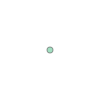

In [27]:
all_points[0]

In [28]:
#Associate each mapped pothole with its df index
potholes_tup = []
for hole in xrange(df.shape[0]):
    potholes_tup.append((all_points[hole], df.index.tolist()[hole]))
        

In [29]:
# Use prep to optimize polygons for faster computation

hood_polygons = prep(MultiPolygon(list(df_map['poly'].values))) #I could put tuples in this list, 
                                                                #where the 2nd elem is the neighborhood index.
                                                                #then they're associated with the hood_polygons

In [52]:
hood_polygons = MultiPolygon(list(df_map_sub['poly'].values))

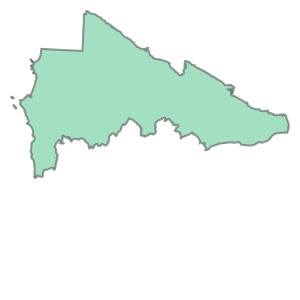

In [53]:
hood_polygons

In [ ]:
#Associate each block group with its index
blockgroups_tup = []
for hood in xrange(df_map.shape[0]):
    blockgroups_tup.append((MultiPolygon(list(df_map['poly'].values))[hood], df_map['name'][hood]))

OK, this is not going to work.  I cannot save/process this massive tuple.  I need to clip out/focus on just the relevant block groups.